# Основная задача проекта

Выявление основных факторов, влияющих на продвижение игр в зависимости от площадки на котрой они выпускаются с помощью инструментов визуализации, предобработки данных и статистического анализа.

## Оглавление

* [Открываем файл и изучаем общую информацию][# Откроем файл с данными и изучим общую информацию]
* [Подготовка данных][Подготовка данных]
* [Анализ и описание данных][Анализ и описание данных]
* [Составляем портрет пользователя][Составляем портрет пользователя]
* [Проверка гипотез][Проверка гипотез]
* [Общие выводы][Общие выводы]

# Откроем файл с данными и изучим общую информацию

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xlrd


In [31]:
workbook = xlrd.open_workbook('one.xls', ignore_workbook_corruption=True)
game_DB = pd.read_excel(workbook)
game_DB

,Name,Platform,Year_of_Release,Genre,Other_sales,User_Score,Critic_Score
0,Astro’s Playroom,PS5,2020,Action,4.500,1973,326
1,Deathloop,PS5,2021,Action,5.000,20707,6352
2,Demon’s Souls,PS5,2020,Action,1.400,347781,21171
3,Destruction AllStars,PS5,2021,Simulation,NaN,834,52
4,Final Fantasy VII Remake Intergrade,PS5,2021,RPG,7.000,18392,2174
5,Ghostwire: Tokyo,PS5,2019,Action,0.025,12900,2943
6,Gran Turismo 7,PS5,2022,Racing,0.032,15300,3190
7,Horizon Forbidden West,PS5,2020,Action,8.400,1736,326
8,Ratchet & Clank: Rift Apart,PS5,2021,Action,1.100,7628,874
9,Returnal,PS5,2020,Action,0.560,5114,1095


In [32]:
game_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             29 non-null     object 
 1   Platform         29 non-null     object 
 2   Year_of_Release  29 non-null     int64  
 3   Genre            29 non-null     object 
 4   Other_sales      28 non-null     float64
 5   User_Score       29 non-null     int64  
 6   Critic_Score     29 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ KB


## Описание данных

Данные о продажах игр (c платформы SteamDB) показывающее, оценки пользователей, жанры и платформы с 2015 по 2023 год

__Name__ — название игры

__Platform__ — платформа

__Year_of_Release__ — год выпуска

__Genre__ — жанр игры

__Sales__ — продажи в странах мир (миллионы долларов)

__Critic_Score__ — положительные оценки пользователей  

__User_Score__ — отрицательные оценки пользователей 

## Вывод
Получили таблицу, содержащую информацию о различных играх: платформах, на которых они выходили, дате выхода, продажах. Необходимо обработать пропущенные значения, а так же дополнить типы данных в столбцах с годом выпуска и добавить возростной рейтинг.

# Подготовка данных

In [33]:
game_DB.columns = map(str.lower, game_DB.columns)
game_DB.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'other_sales',
       'user_score', 'critic_score'],
      dtype='object')

In [34]:
game_DB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             29 non-null     object 
 1   platform         29 non-null     object 
 2   year_of_release  29 non-null     int64  
 3   genre            29 non-null     object 
 4   other_sales      28 non-null     float64
 5   user_score       29 non-null     int64  
 6   critic_score     29 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 1.7+ KB


In [35]:
game_DB.head()

,name,platform,year_of_release,genre,other_sales,user_score,critic_score
0,Astro’s Playroom,PS5,2020,Action,4.5,1973,326
1,Deathloop,PS5,2021,Action,5.0,20707,6352
2,Demon’s Souls,PS5,2020,Action,1.4,347781,21171
3,Destruction AllStars,PS5,2021,Simulation,NaN,834,52
4,Final Fantasy VII Remake Intergrade,PS5,2021,RPG,7.0,18392,2174


Перед тем, как изменять типы данных, обработаем пропуски.

Пропуски присутствуют в столбце other_sales.

In [36]:
game_DB[game_DB['other_sales'].isna() == True]

,name,platform,year_of_release,genre,other_sales,user_score,critic_score
3,Destruction AllStars,PS5,2021,Simulation,NaN,834,52


In [37]:
print('Пропуски до:', game_DB['other_sales'].isna().sum())
game_DB = game_DB[game_DB['other_sales'].isna() == False]
print('Пропуски после:', game_DB['other_sales'].isna().sum())

Пропуски до: 1
Пропуски после: 0


Удалили единственный пропуск, связанный с отсутсвием информации о продажах данной игры.

In [38]:
game_DB['user_score'].value_counts()

user_score
1973       2
9216       1
120470     1
85937      1
730876     1
1495302    1
56032      1
219937     1
574903     1
468260     1
528829     1
85672      1
231097     1
618824     1
20707      1
42674      1
117972     1
140605     1
29003      1
5114       1
7628       1
1736       1
15300      1
12900      1
18392      1
347781     1
704119     1
Name: count, dtype: int64

## Вывод 

Избавились от пропуска, в столбце other_sales. Так же были проверены типы данных для дальнейшего анализа.

# Проведем исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы.

In [39]:
games_by_year = game_DB.groupby('year_of_release').agg({'name':'count'})
games_by_year

,name
year_of_release,
2015,2
2017,1
2019,2
2020,8
2021,5
2022,3
2023,7


Построим гистограмму распределения выпущенных игр по годам.

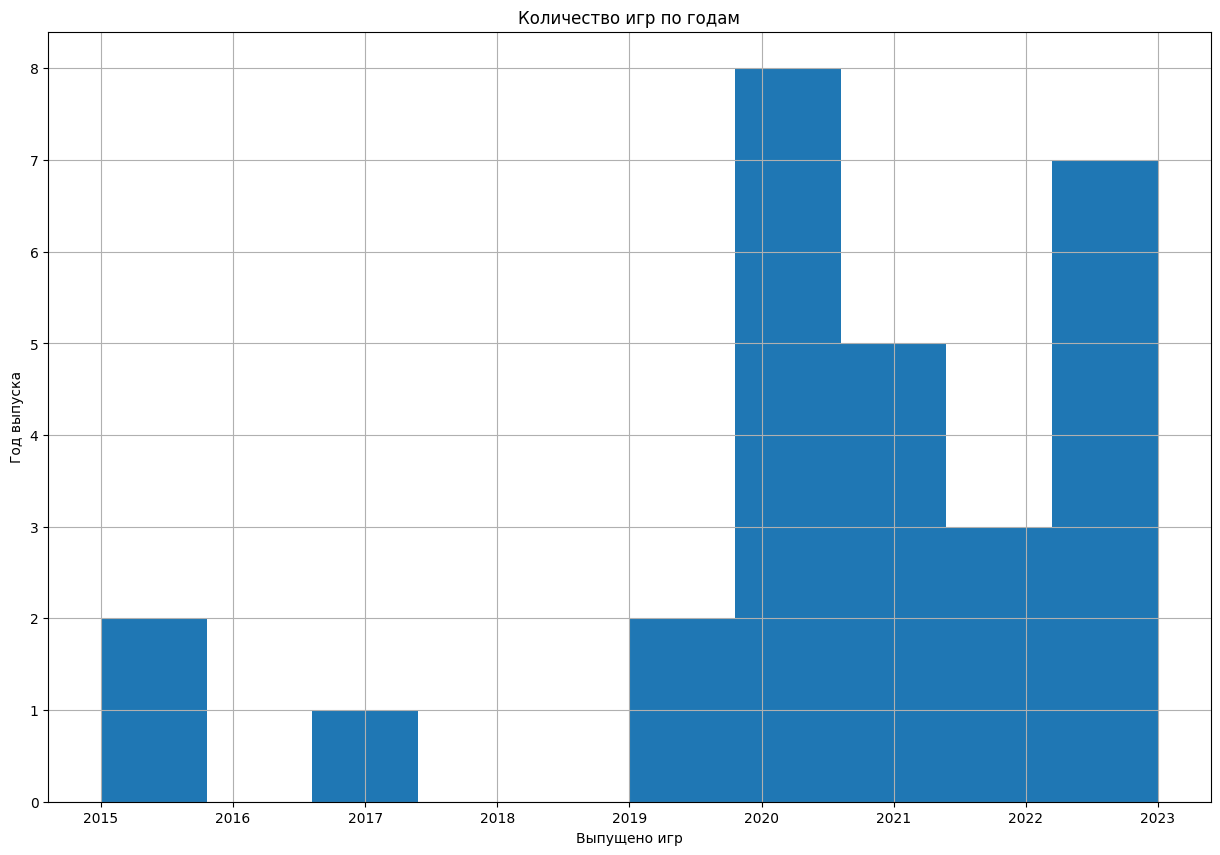

In [40]:
plt.title('Количество игр по годам')
hist_games = game_DB['year_of_release'].hist(bins = 10, figsize = (15,10))
hist_games.set_xlabel('Выпущено игр')
hist_games.set_ylabel('Год выпуска')
plt.show()

Можно увидиеть, что большенство популярных эксклюзивов вышло в последние 5 лет

In [41]:
game_DB

,name,platform,year_of_release,genre,other_sales,user_score,critic_score
0,Astro’s Playroom,PS5,2020,Action,4.500,1973,326
1,Deathloop,PS5,2021,Action,5.000,20707,6352
2,Demon’s Souls,PS5,2020,Action,1.400,347781,21171
4,Final Fantasy VII Remake Intergrade,PS5,2021,RPG,7.000,18392,2174
5,Ghostwire: Tokyo,PS5,2019,Action,0.025,12900,2943
6,Gran Turismo 7,PS5,2022,Racing,0.032,15300,3190
7,Horizon Forbidden West,PS5,2020,Action,8.400,1736,326
8,Ratchet & Clank: Rift Apart,PS5,2021,Action,1.100,7628,874
9,Returnal,PS5,2020,Action,0.560,5114,1095
10,Spider-Man: Miles Morales,PS5,2020,Action,33.000,29003,1984


Определим рейтинг платформ с играми с самыми большими продажами 

In [44]:
platform_pi = game_DB.pivot_table(index = 'platform', values = 'other_sales', aggfunc = 'sum')
top_platforms = platform_pi.sort_values(by = 'other_sales',ascending = False).head(5)
top_platforms

,other_sales
platform,
All,338.200
PS5,68.417
Xbox Series X,39.100
PC,13.000
PC/ Xbox,12.500


Построим распределение самых популярных платформ по годам.

In [45]:
top5_list = top_platforms.index.tolist()
top5_list

['All', 'PS5', 'Xbox Series X', 'PC', 'PC/ Xbox']

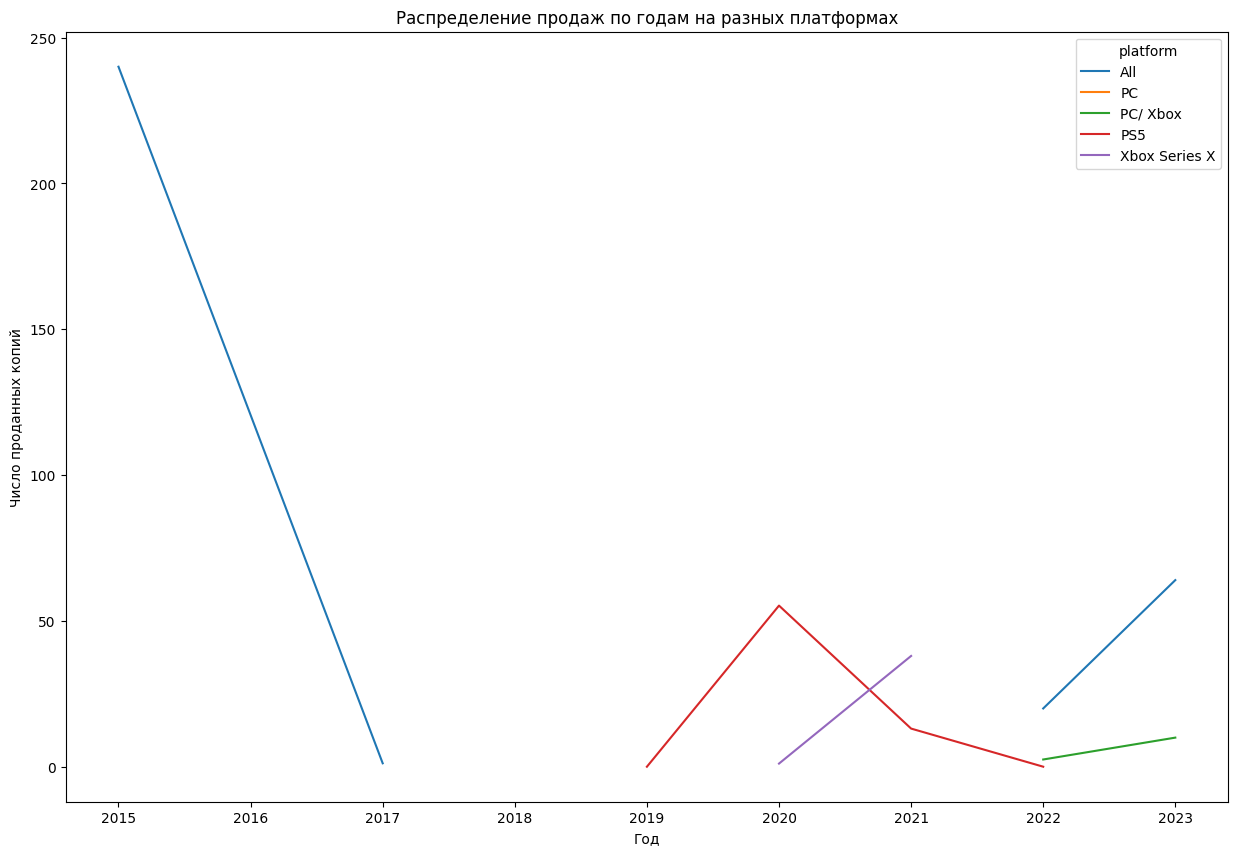

In [47]:
pivot_for_analysis = game_DB.query('platform in @top5_list')
popular_platforms = pivot_for_analysis.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'other_sales', aggfunc = 'sum')
plot_for_analysis = popular_platforms.plot(figsize=(15,10))
#plot_for_analysis = sns.distplot(pivot_for_analysis, x = "year_of_release", hue="platform", kind="kde", fill=True)
plot_for_analysis.set_xlabel('Год')
plot_for_analysis.set_ylabel('Число проданных копий')
plt.title("Распределение продаж по годам на разных платформах")
plt.show()

In [48]:
popular_platforms.describe()

platform,All,PC,PC/ Xbox,PS5,Xbox Series X
count,5.000000,2.000000,2.000000,4.000000,2.00000
mean,67.640000,6.500000,6.250000,17.104250,19.55000
std,99.235316,4.949747,5.303301,26.172873,26.09224
min,1.200000,3.000000,2.500000,0.025000,1.10000
25%,13.000000,4.750000,4.375000,0.030250,10.32500
50%,20.000000,6.500000,6.250000,6.566000,19.55000
75%,64.000000,8.250000,8.125000,23.640000,28.77500
max,240.000000,10.000000,10.000000,55.260000,38.00000


Самые популярные игры судя по графику имеют среднее время жизни около 2-3 года, после чего продажи становятся незначительными. 

Самые популярные игры, также выгоднее выпускать на всех платфорамах All.

In [55]:
minimum_sales = 1
report = game_DB.query('other_sales > @minimum_sales')
report = report[report['year_of_release'] <= 2023]
report = report.groupby('platform').agg({'year_of_release':'nunique'})#.rename(columns = {'years_of_release':'lifetime'})
median_platform_lifetime = int(report.median()[0])
print("Медианное время жизни игры cоставляет {} года ".format(median_platform_lifetime))

Медианное время жизни игры cоставляет 2 года 


C:\Users\Олег\AppData\Local\Temp\ipykernel_2712\4254971696.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median_platform_lifetime = int(report.median()[0])


In [56]:
actual_data = 2023 - median_platform_lifetime
print('Актуальный период выпуска эксклюзивов: от {} до 2023 года'.format(actual_data))

Актуальный период выпуска эксклюзивов: от 2021 до 2023 года


In [54]:
data_for_prediction = game_DB.query('@actual_data <= year_of_release <= 2023')
data_for_prediction

,name,platform,year_of_release,genre,other_sales,user_score,critic_score
1,Deathloop,PS5,2021,Action,5.000,20707,6352
4,Final Fantasy VII Remake Intergrade,PS5,2021,RPG,7.000,18392,2174
6,Gran Turismo 7,PS5,2022,Racing,0.032,15300,3190
8,Ratchet & Clank: Rift Apart,PS5,2021,Action,1.100,7628,874
12,Forza Horizon 5,Xbox Series X,2021,Racing,18.000,140605,18836
13,Halo Infinite,Xbox Series X,2021,Action,20.000,117972,49366
16,Call of Duty,All,2023,Action,30.000,9216,2727
17,Hogwarts Legacy,All,2023,Adventure,22.000,231097,20667
18,Starfield,PC/ Xbox,2023,RPG,10.000,85672,55621
19,Baldur’s Gate III,All,2023,Adventure,5.200,528829,17695


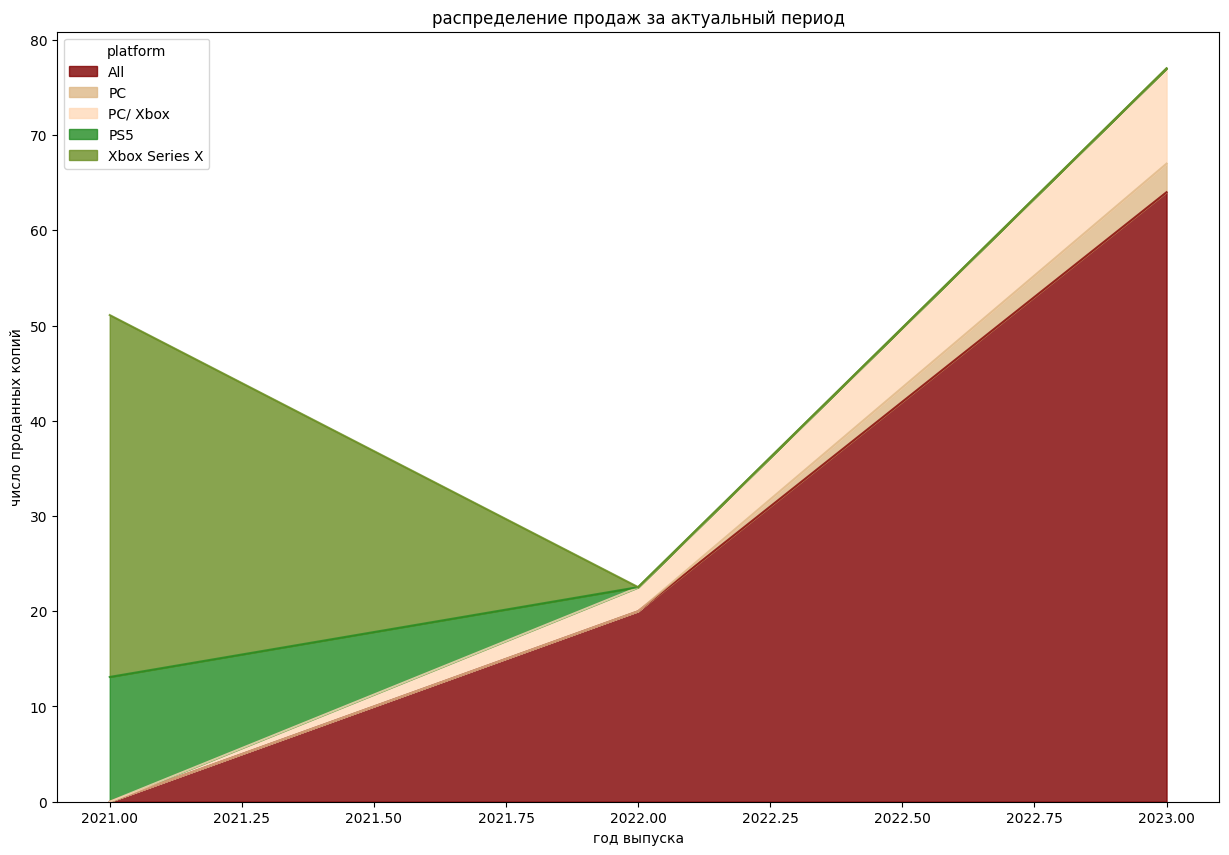

In [60]:
colors = ['maroon','burlywood','peachpuff','forestgreen','olivedrab' 
         ]
plot_of_prediction = data_for_prediction.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'other_sales', aggfunc = 'sum').plot.area(
    figsize = (15,10),color = colors, alpha = 0.8
                                                                                                    )
plot_of_prediction.set_xlabel('год выпуска')
plot_of_prediction.set_ylabel('число проданных копий')
plt.title('распределение продаж за актуальный период')
plt.show()

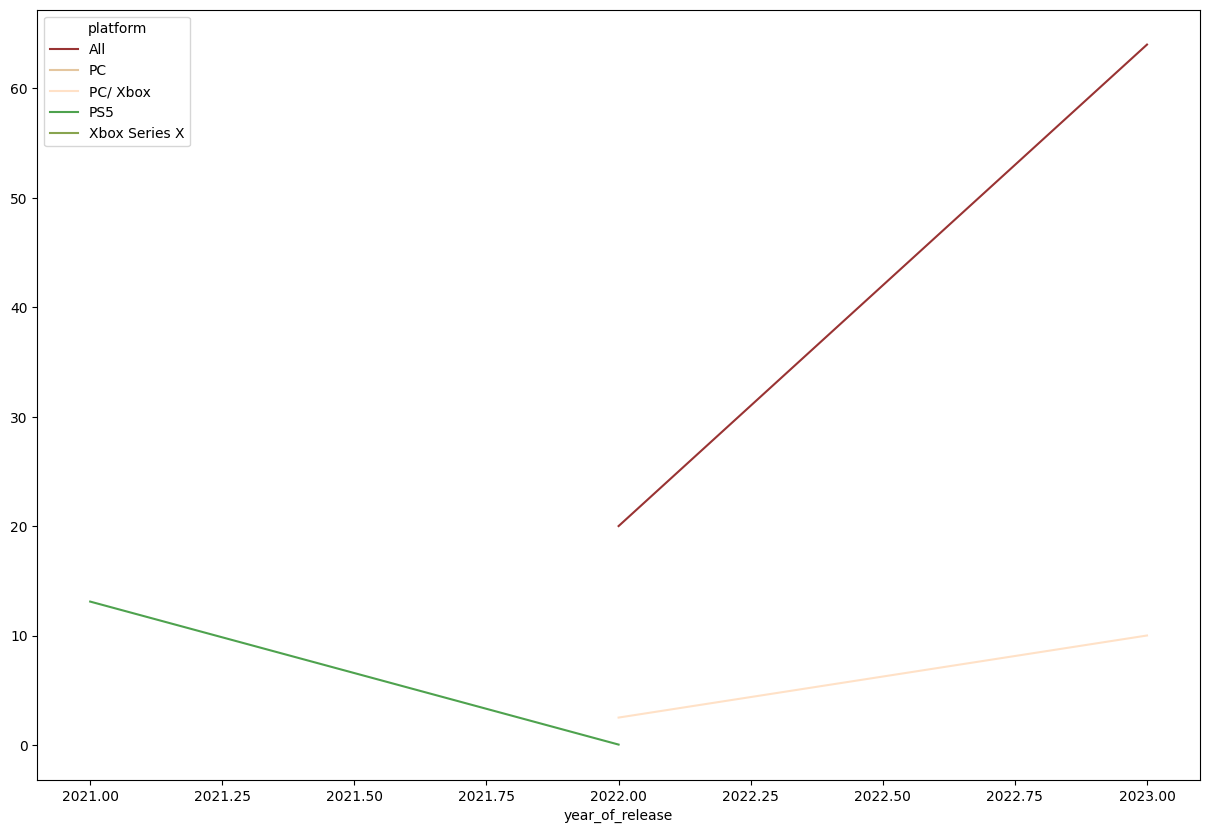

In [62]:
plot_of_prediction = data_for_prediction.pivot_table(
    index = 'year_of_release', columns = 'platform', values = 'other_sales', aggfunc = 'sum').plot(
    figsize = (15,10),color = colors, alpha = 0.8
    )

Из графика видно, что закономерно, самые популярные игры размещены на всех платформах, платформы ps5 и xbox x по количеству и продаже эксклюзивов сохраняют относительный паритет. xbox x выигрывает за счет эксклюзивов, которые выпускаются также и на pc, что позволяет расширить аудиторию данных игр. 

Text(0, 0.5, 'глобальные продажы')

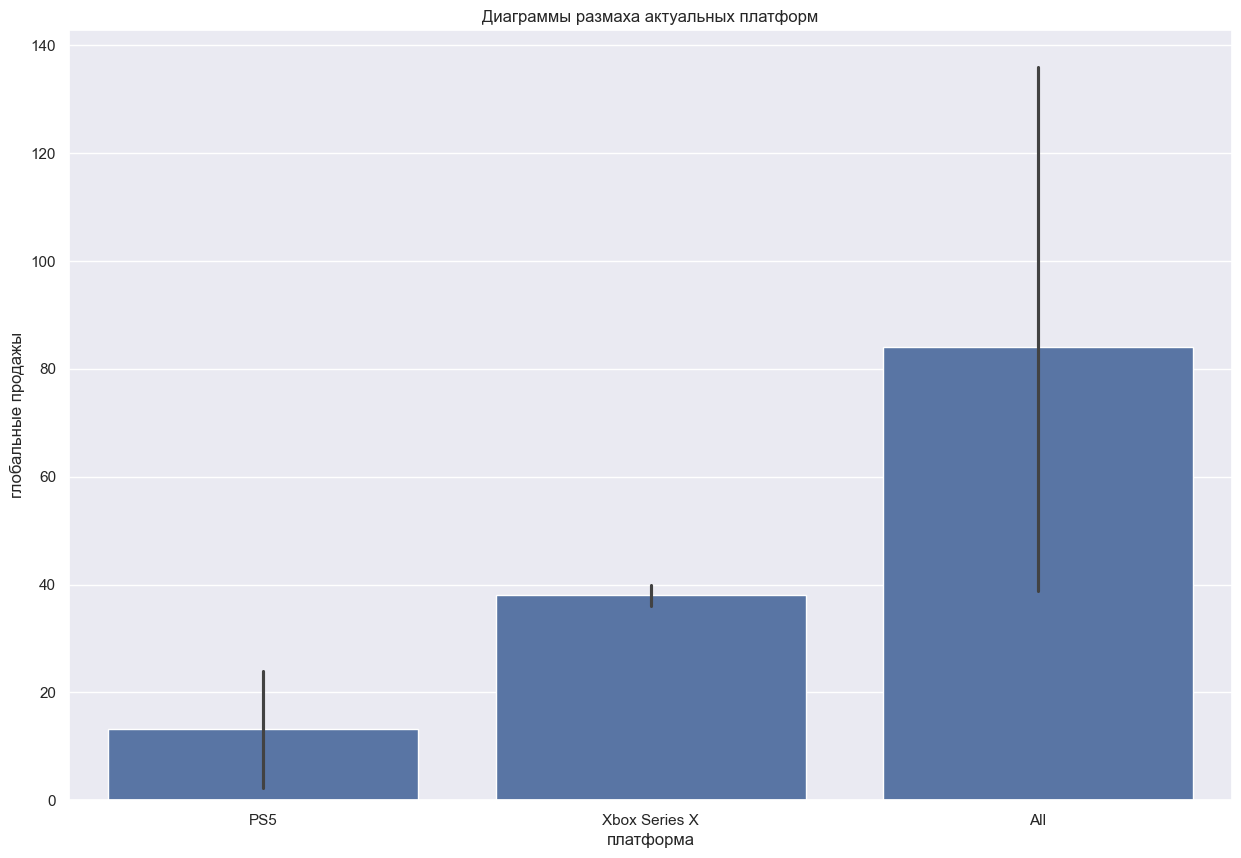

In [76]:
#Хотел сделать по срезу основных платформ но что-то не получилось, пришлось делать стандартную диаграмму размаха
actual_platform = data_for_prediction.query('platform == "PS5" | platform == "Xbox Series X" | platform == "All"')

# sns.set(rc={'figure.figsize':(15, 10)})
# ax = sns.boxplot(x = "platform", y = 'other_sales', data = actual_platform)
# plt.ylim(0,3)
# plt.title('Диаграммы размаха актуальных платформ')
# ax.set_xlabel('платформа')
# ax.set_ylabel('глобальные продажы')
# plt.show()

ax = sns.barplot(data=actual_platform, x="platform", y="other_sales", estimator=np.sum)
plt.title('Диаграммы размаха актуальных платформ')
ax.set_xlabel('платформа')
ax.set_ylabel('глобальные продажы')

Продажи на платформах PS5 и Xbox Series X  сопоставимы, медианы находятся почти на одном уровне. При этом верхний квартиль у PS5 немного больше,чем у Xbox Series X. PC отстает по продажам. А вто игры выпущенные на всех платформах опережают своих конкурентов во много раз, что закономерно.

Создадим функцию расчета зависимости между отзывами и продажами для различных платформ, а так же построения диаграммы рассеяния

In [75]:
def correlation(platform):
    sales = data_for_prediction.query('platform == @platform')[['critic_score', 'user_score','other_sales']]
    print(sales.corr())
    pd.plotting.scatter_matrix(sales)
    plt.show()

              critic_score  user_score  other_sales
critic_score      1.000000    0.794596     0.292504
user_score        0.794596    1.000000     0.670820
other_sales       0.292504    0.670820     1.000000


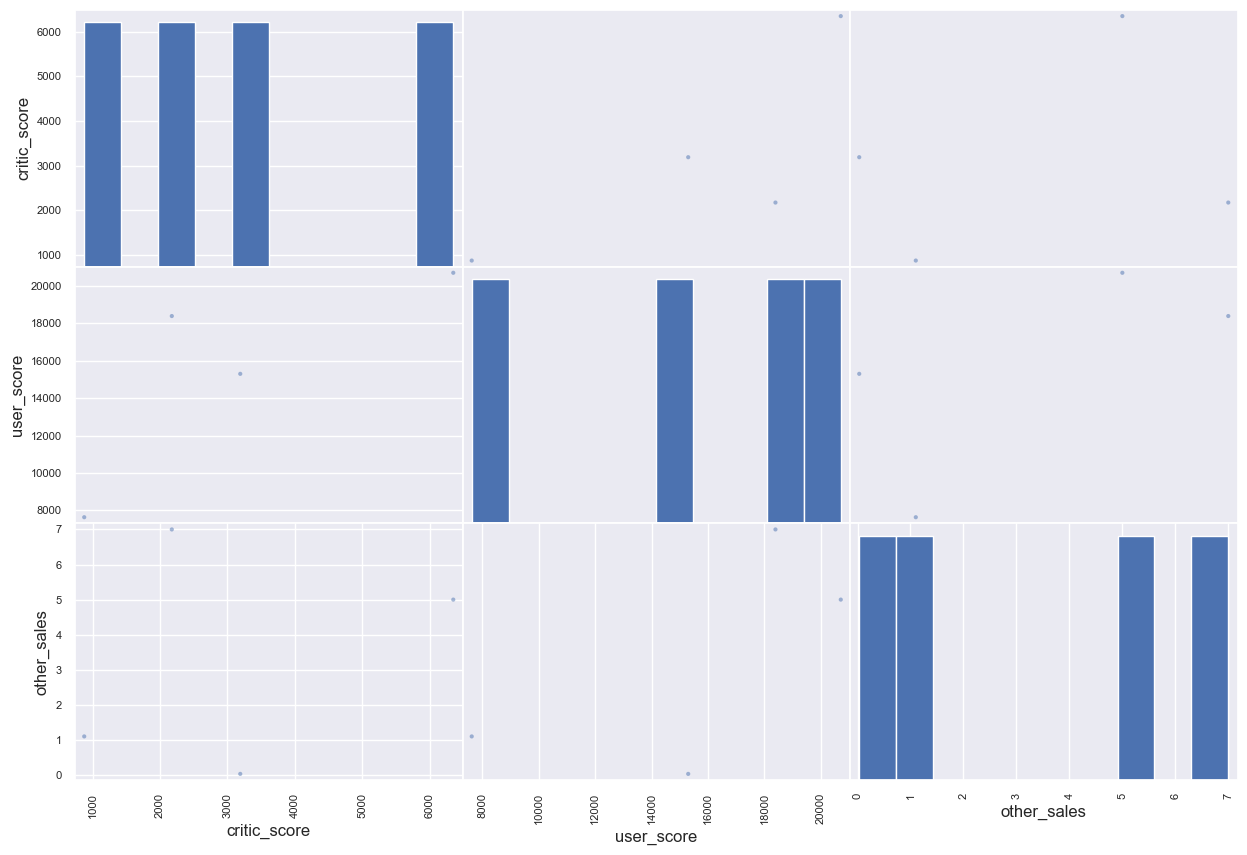

In [77]:
correlation('PS5')

              critic_score  user_score  other_sales
critic_score           1.0        -1.0          1.0
user_score            -1.0         1.0         -1.0
other_sales            1.0        -1.0          1.0


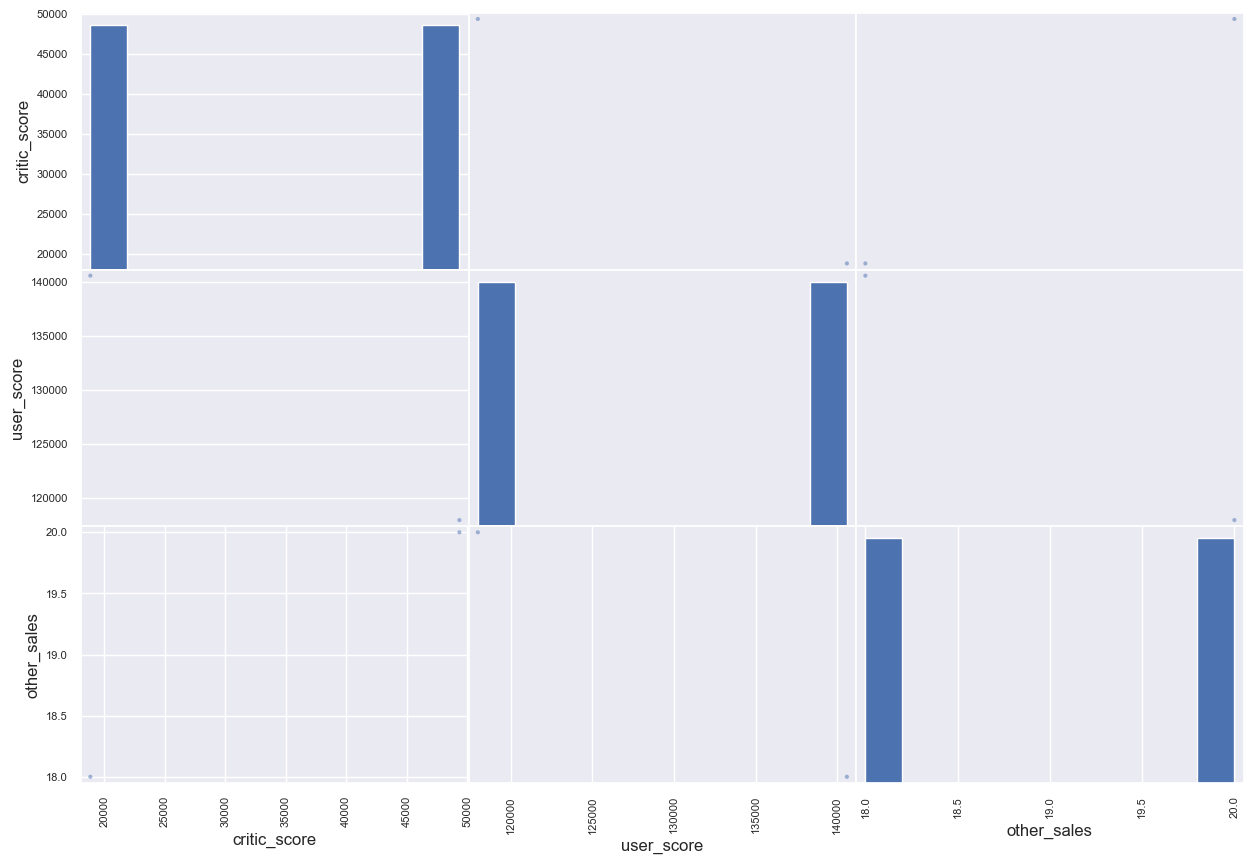

In [78]:
correlation('Xbox Series X')

              critic_score  user_score  other_sales
critic_score      1.000000    0.883379     0.255086
user_score        0.883379    1.000000    -0.016469
other_sales       0.255086   -0.016469     1.000000


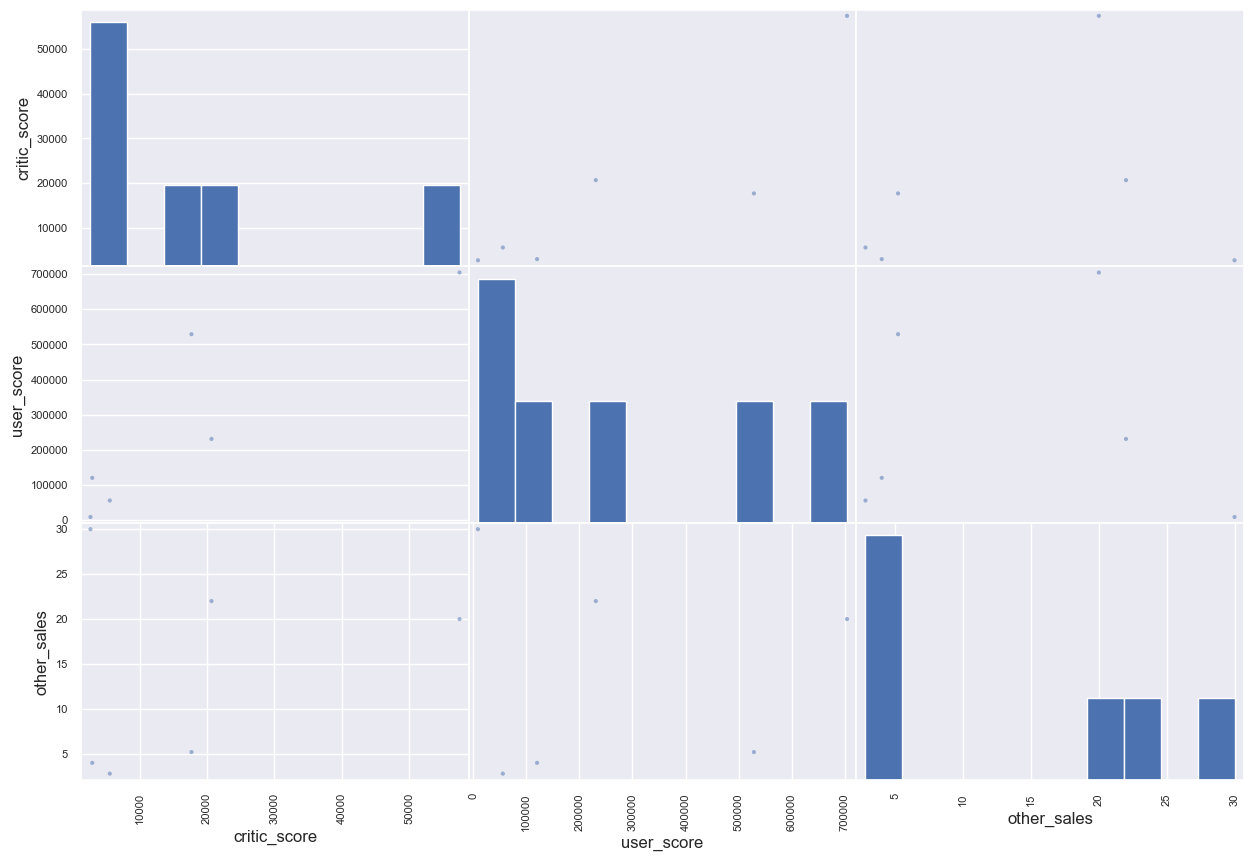

In [79]:
correlation('All')

Из посчитанного коэффициента корелляции и построенных диаграмм рассеяния видим, что продажи не сильно зависят от оценок пользователей.

## Посмотрим на общее распределение по жанрам.

In [83]:
genres = data_for_prediction.pivot_table(index = 'genre', values = 'other_sales').sort_values(by = 'other_sales', ascending = False).head()
genres

,other_sales
genre,
Action,12.000000
Action,10.233333
Adventure,10.066667
Racing,9.016000
RPG,8.500000


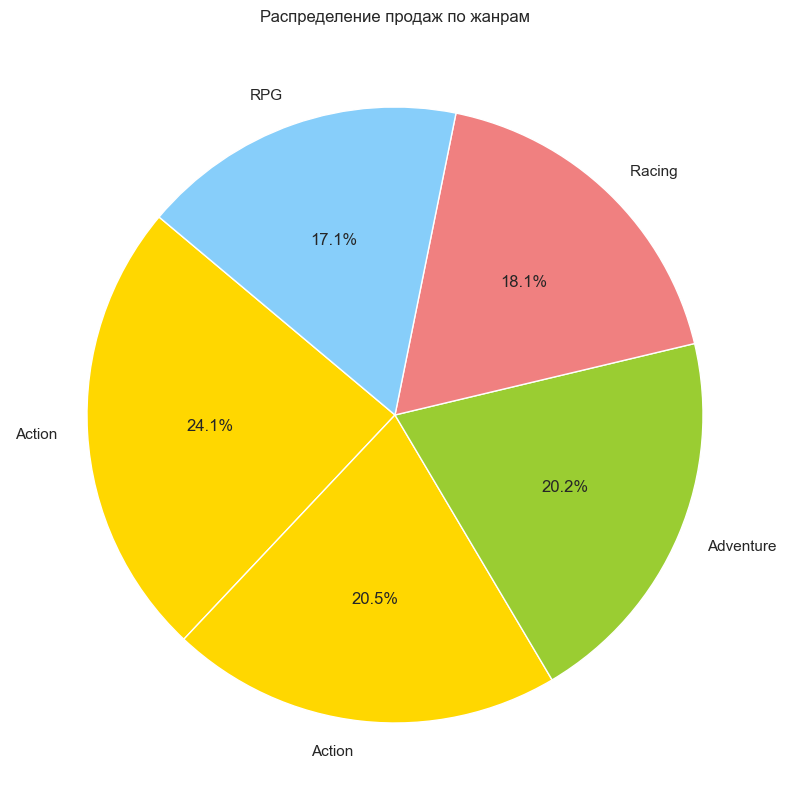

In [87]:
#'burlywood'
colors = ['gold','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
sizes = genres['other_sales']
plt.pie(sizes , labels = genres.index,colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Распределение продаж по жанрам')
plt.show()

Самый прибыльный жанр - Action, удивительно, что RPG обладают столь низким уровнем продаж.